### 1.7 Network Graph Visualisation

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
# Import relationship data
relationship_df = pd.read_csv('/Users/vickyczada/Library/CloudStorage/OneDrive-Personal/Documents/Career Foundry/Data Visualisation with Python/20th-century/20th_century_relationship.csv')

In [4]:
relationship_df

,Unnamed: 0,source,target,value
0,0,Austria,France,6
1,1,Austria,Russia,5
2,2,Germany,Russia,21
3,3,Germany,Italy,25
4,4,Austria,Germany,10
...,...,...,...,...
71,71,Germany,Norway,6
72,72,Greece,Italy,3
73,73,Italy,Japan,6
74,74,Romania,Russia,6


In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualisation- Networkx

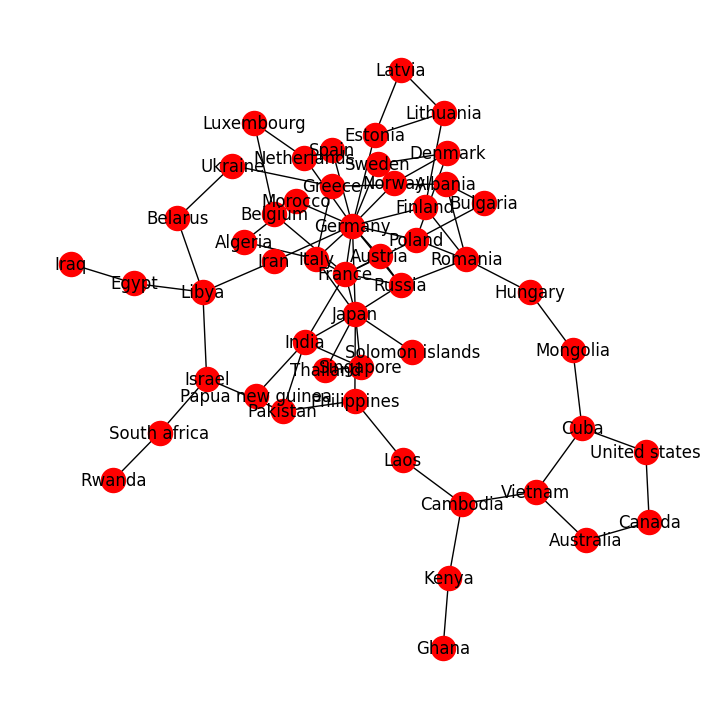

In [6]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [7]:
h.savefig('networkx_plt_20th_century.png')

### Graph visualisation - Pyvis

In [8]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

In [9]:
# Define nodes from the G object
node_degree = dict(G.degree)

In [10]:
# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

20th_century.html


### Community detection - Leiden algorithm

In [13]:
from cdlib import algorithms
coms = algorithms.leiden(G)

In [14]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [15]:
new_com = coms.to_node_community_map()

In [16]:
new_com

defaultdict(list,
            {'Laos': [0],
             'Cambodia': [0],
             'Kenya': [0],
             'Ghana': [0],
             'Hungary': [0],
             'Mongolia': [0],
             'Cuba': [0],
             'United states': [0],
             'Canada': [0],
             'Australia': [0],
             'Vietnam': [0],
             'Austria': [1],
             'France': [1],
             'Russia': [1],
             'Germany': [1],
             'Spain': [1],
             'Poland': [1],
             'Finland': [1],
             'Denmark': [1],
             'Norway': [1],
             'Sweden': [1],
             'Romania': [1],
             'Japan': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Philippines': [2],
             'Solomon islands': [2],
             'India': [2],
             'Pakistan': [2],
             'Papua new guinea': [2],
             'Italy': [3],
             'Albania': [3],
             'Greece': [3],
             'U

In [17]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [18]:
dict_com

{'Laos': 0,
 'Cambodia': 0,
 'Kenya': 0,
 'Ghana': 0,
 'Hungary': 0,
 'Mongolia': 0,
 'Cuba': 0,
 'United states': 0,
 'Canada': 0,
 'Australia': 0,
 'Vietnam': 0,
 'Austria': 1,
 'France': 1,
 'Russia': 1,
 'Germany': 1,
 'Spain': 1,
 'Poland': 1,
 'Finland': 1,
 'Denmark': 1,
 'Norway': 1,
 'Sweden': 1,
 'Romania': 1,
 'Japan': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Philippines': 2,
 'Solomon islands': 2,
 'India': 2,
 'Pakistan': 2,
 'Papua new guinea': 2,
 'Italy': 3,
 'Albania': 3,
 'Greece': 3,
 'Ukraine': 3,
 'Belarus': 3,
 'Morocco': 3,
 'Algeria': 3,
 'Bulgaria': 3,
 'Libya': 4,
 'Egypt': 4,
 'Iraq': 4,
 'Israel': 4,
 'South africa': 4,
 'Iran': 4,
 'Rwanda': 4,
 'Estonia': 5,
 'Latvia': 5,
 'Lithuania': 5,
 'Netherlands': 6,
 'Luxembourg': 6,
 'Belgium': 6}

In [19]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


The Leiden algorithm enhances community detection by optimising modularity, which measures the difference between expected and actual connections within a community. These connections are informed by how frequently countries interact with each other.
Countries with higher communication frequencies are typically grouped together, as shown by the edges that reflect these interactions.

In the blue group, countries from Europe such as Germany, France, and Italy, along with African countries. This reflects strong historical ties due to significant past events such as world wars, colonial interactions, and trade, which are visually represented by the prominent blue pathways.

The green group highlights Asian countries, with a notable connection between India and Pakistan, symbolising their complex historical and colonial relationship. Other countries like Japan are included due to their economic strengthening, all of which the algorithm recognises as a cohesive community.

The yellow group includes Belgium, the Netherlands and Luxembourg. These countries likely form a community due to similar economic trajectories and regional agreements fostering collaboration.

The purple group consists largely of Middle Eastern nations, where historical trade relations and political ties contribute to high modularity scores, indicating strong interconnectivity.

The red group which has Libya, Belarus, Ukraine, Greece, Italy, Albania, Bulgaria, Algeria, and Morocco are influenced by historical colonial legacies, regional geopolitical relationships, and economic trade ties. Many of these countries share common heritage or regional cooperation, which strengthens their interactions within Europe, North Africa, and the Mediterranean.

Finally, the connection between Australia, Canada, the U.S., Vietnam, Cuba, Mongolia, Cambodia, Laos, Kenya, and Ghana might stem from shared historical ties, economic relationships, and geopolitical interests.

### Centrality measures

#### a. Degree centrality

In [20]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Austria': 0.06,
 'France': 0.16,
 'Russia': 0.1,
 'Germany': 0.28,
 'Italy': 0.1,
 'Spain': 0.02,
 'Poland': 0.1,
 'Estonia': 0.06,
 'Latvia': 0.04,
 'Lithuania': 0.06,
 'Finland': 0.06,
 'Denmark': 0.06,
 'Norway': 0.04,
 'Sweden': 0.04,
 'Netherlands': 0.04,
 'Luxembourg': 0.04,
 'Belgium': 0.04,
 'Albania': 0.06,
 'Greece': 0.06,
 'Ukraine': 0.04,
 'Belarus': 0.04,
 'Libya': 0.08,
 'Egypt': 0.04,
 'Iraq': 0.02,
 'Japan': 0.18,
 'Morocco': 0.04,
 'Algeria': 0.04,
 'Thailand': 0.04,
 'Singapore': 0.06,
 'Philippines': 0.06,
 'Solomon islands': 0.02,
 'India': 0.1,
 'Pakistan': 0.06,
 'Israel': 0.06,
 'South africa': 0.04,
 'Iran': 0.04,
 'Papua new guinea': 0.02,
 'Laos': 0.04,
 'Cambodia': 0.06,
 'Kenya': 0.04,
 'Ghana': 0.02,
 'Romania': 0.1,
 'Bulgaria': 0.04,
 'Hungary': 0.04,
 'Mongolia': 0.04,
 'Cuba': 0.06,
 'United states': 0.04,
 'Canada': 0.04,
 'Australia': 0.04,
 'Vietnam': 0.06,
 'Rwanda': 0.02}

In [21]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [22]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

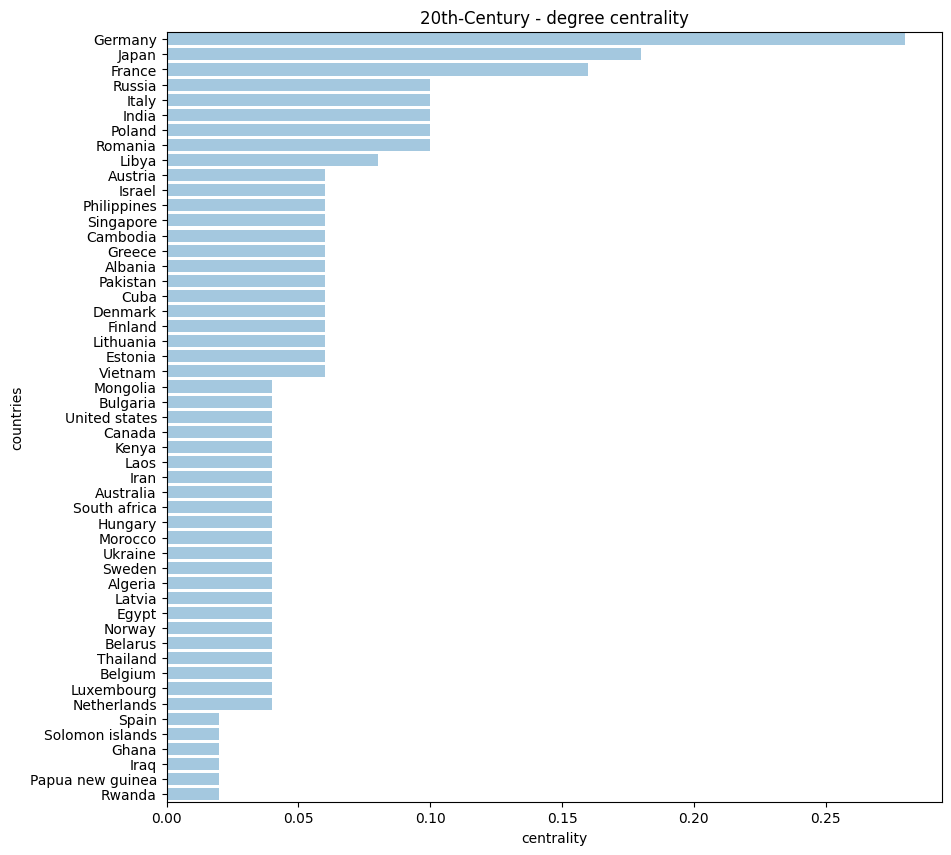

In [28]:
# Plot the degree centrality

plt.figure(figsize = (10, 10))
with sns.color_palette("Blues_d", n_colors=20):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th-Century - degree centrality")

The bar chart indicates that Germany has the highest degree of centrality, followed by Japan, highlighting their extensive connections with other countries in the 20th-century network. This reflects their significant roles in global political, economic, and historical events during that period. Their high centrality underscores their influence in shaping international relations and regional developments. Overall, the degree of centrality provides a meaningful overview of the key players and their interconnectedness in this historical context.

#### b. Closeness centrality

In [29]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [30]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

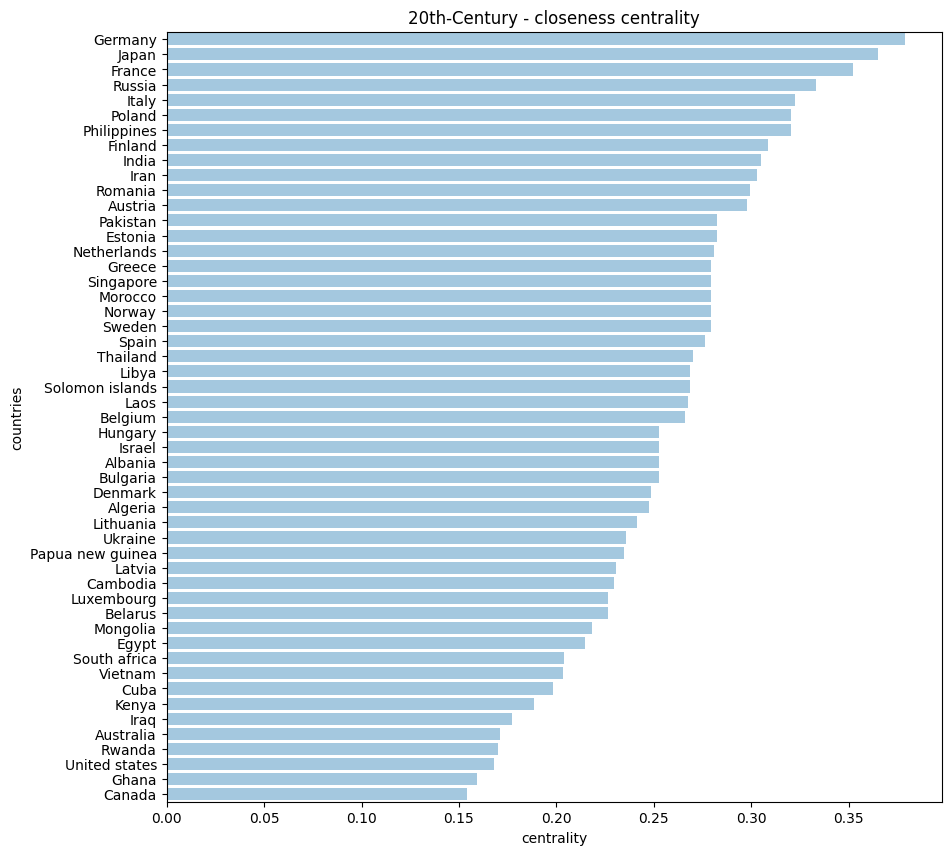

In [42]:
plt.figure(figsize = (10, 10))
with sns.color_palette("Blues_d", n_colors=20):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th-Century - closeness centrality")

The results for closeness centrality closely mirror those of degree centrality, which is expected given their conceptual relationship. However, the closeness scores are higher for all countries, likely reflecting how events in one part of the world—such as socio-economic or political upheavals—can rapidly influence other regions, emphasizing the interconnectedness of global affairs during that period.

#### Betweenness centrality

In [43]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [44]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

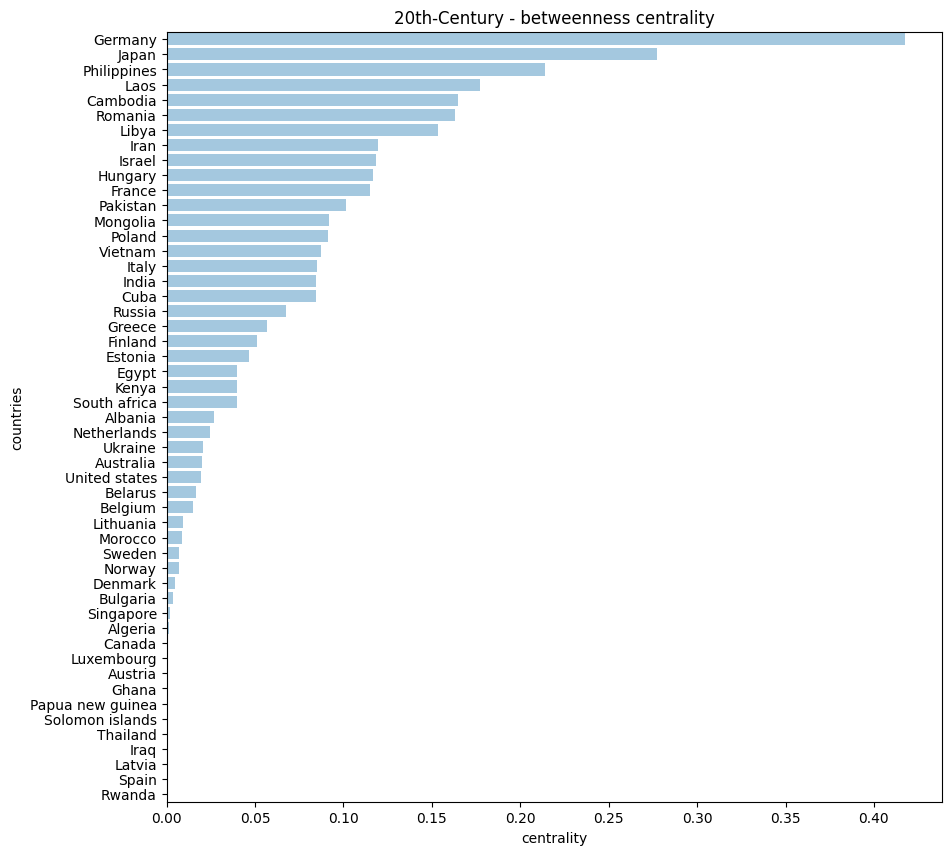

In [45]:
plt.figure(figsize = (10, 10))
with sns.color_palette("Blues_d", n_colors=20):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th-Century - betweenness centrality")

The betweenness centrality results corroborate the earlier findings from the closeness scores, highlighting Germany as the most influential country, followed by Japan. The relatively low scores for all other countries reflect their lesser roles as intermediaries in the network, consistent with the historical events and geopolitical dynamics of the period. This emphasises Germany and Japan's key positions in shaping international interactions during this period.

In [46]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')